This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [2]:
pdata = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/pima-indians-diabetes-2.csv")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(768, 9)

In [4]:
pdata.head() # To check first 5 rows of data set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pdata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [6]:
pdata.isnull().values.any() # If there are any null values in data set

False

In [7]:
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Identify Correlation in data 

In [8]:
pdata.corr() # It will show correlation matrix 

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

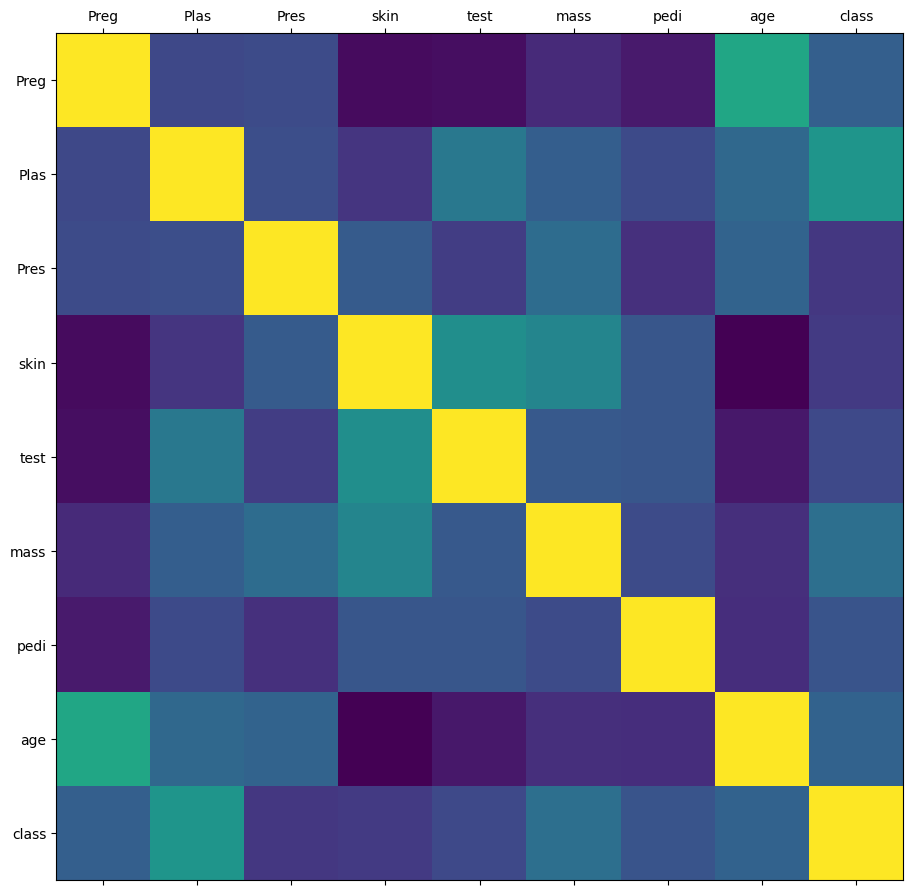

In [10]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

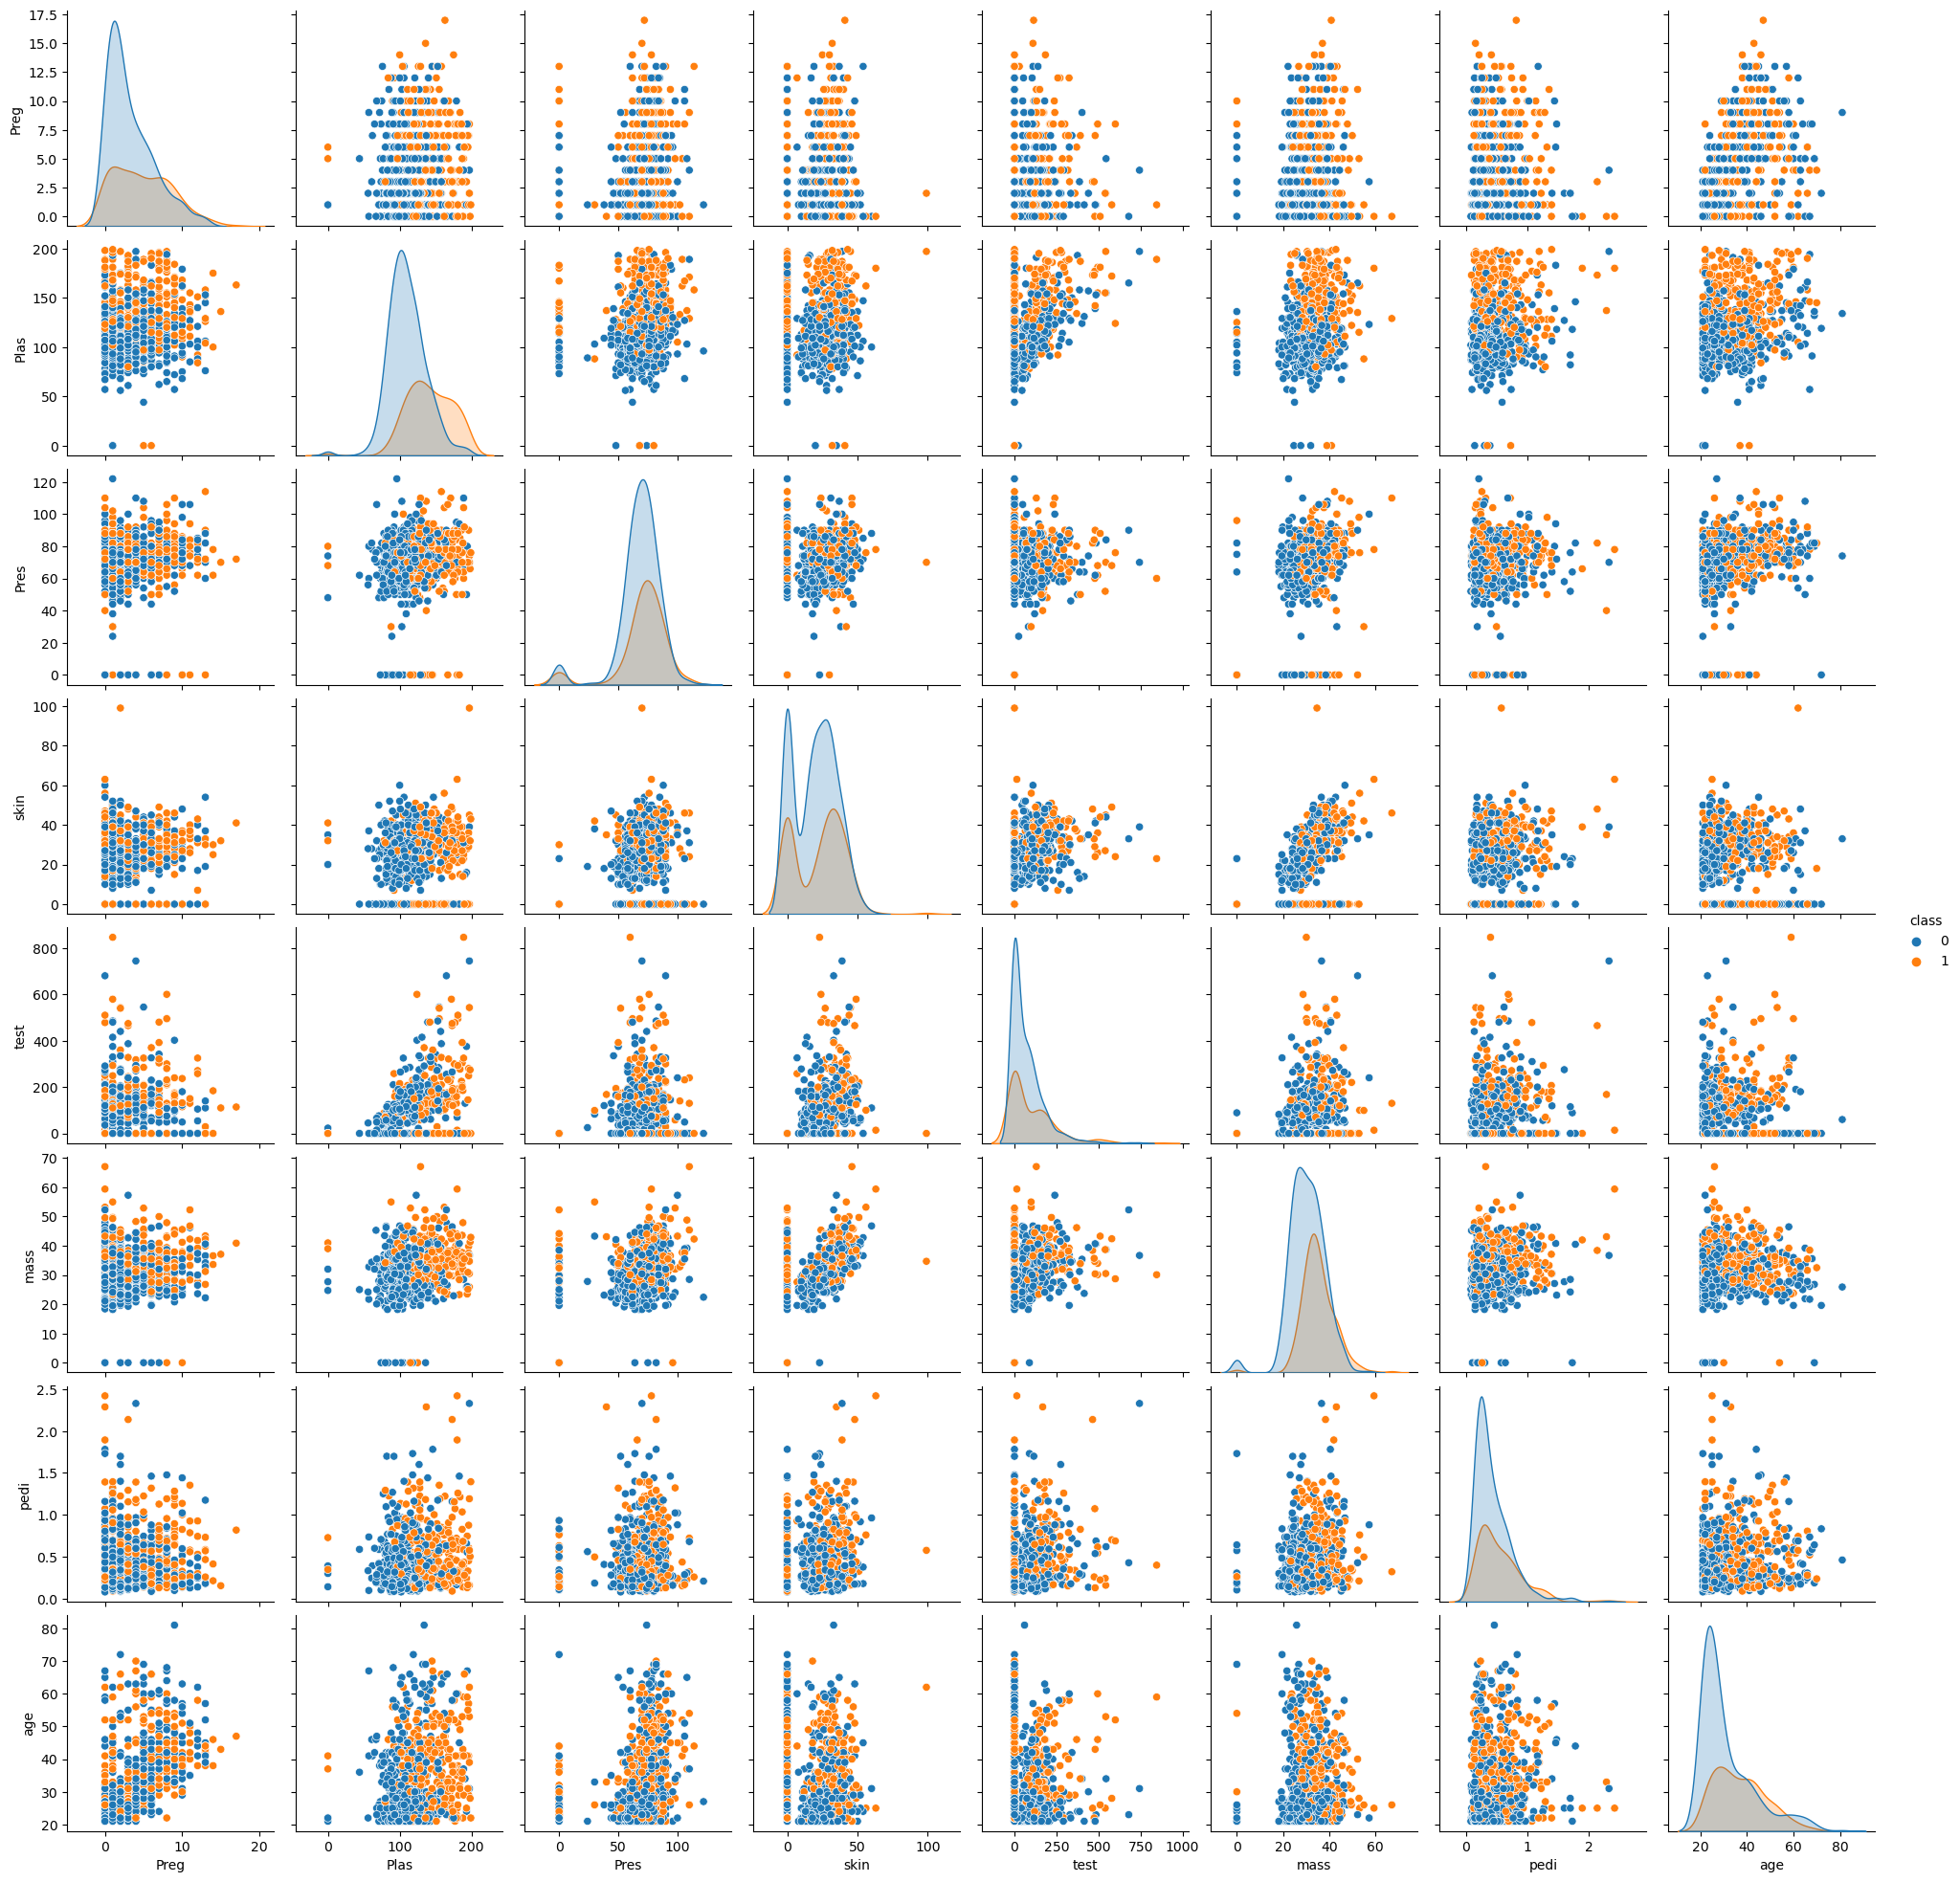

In [11]:
sns.pairplot(pdata,diag_kind='kde',hue='class')

In [12]:
pdata['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X = pdata.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [14]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


We can see lots of 0 entries above.

### Replace 0s with serial mean 

In [15]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


# Logistic Regression

In [16]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4       5         6  \
0  0.124617  0.026152 -0.029826 -0.012465 -0.000087  0.0732  0.359247   

          7  intercept  
0  0.012503  -4.890687  


In [17]:
model_score = model.score(x_train, y_train)
print(model_score)

0.7672253258845437


In [18]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7792207792207793


<Axes: >

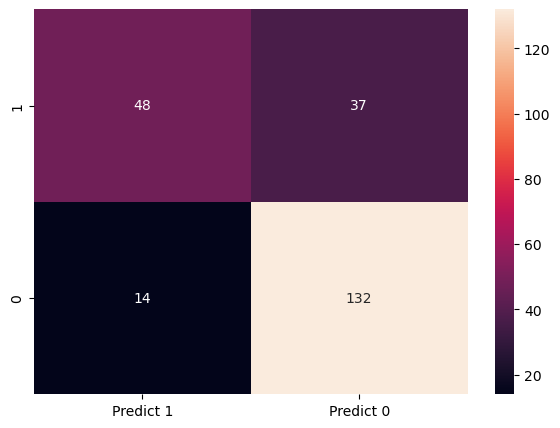

In [19]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
model_2.score(x_train,y_train)

1.0

In [22]:
model_2.score(x_test,y_test)

0.7272727272727273

In [23]:
model_2_pru=DecisionTreeClassifier(max_depth=4)

In [24]:
model_2_pru.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [25]:
model_2_pru.score(x_train,y_train)

0.7858472998137802

In [26]:
model_2_pru.score(x_test,y_test)

0.7445887445887446

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
model_3=BaggingClassifier(n_estimators=100,base_estimator=model_2_pru)

In [29]:
model_3.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  n_estimators=100)

In [30]:
model_3.score(x_train,y_train)

0.8286778398510242

In [31]:
model_3.score(x_test,y_test)

0.7792207792207793

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier()
model_4.fit(x_train,y_train)

AdaBoostClassifier()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model_5=GradientBoostingClassifier()
model_5.fit(x_train,y_train)

GradientBoostingClassifier()

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_6=RandomForestClassifier()

In [35]:
Logistic Regression-> Survived or not   Survived-> 0 an 1

SyntaxError: invalid syntax (4060552672.py, line 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
##  X
## Y=df->survived

In [ ]:
x train x test